In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv('nam_auto.csv')

# Exploring the data

In [211]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,"N$ 59,999",smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,"51,000 km",0.9 l,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,"N$ 74,999",Volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,"54,800 km",1 l,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,"N$ 75,000",Fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,"155,000 km",1.4 l,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,"N$ 75,000",Honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,"161,000 km",2.2 l,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,"N$ 95,900",Datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,"31,000 km",1.2 l,Manual


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 18 columns):
index              1177 non-null int64
url                1177 non-null object
price              1177 non-null object
make               1177 non-null object
model              1177 non-null object
variant            1177 non-null object
reg                1177 non-null object
previous-owners    633 non-null float64
mpg                123 non-null object
colour             1175 non-null object
interior-colour    963 non-null object
exterior-colour    1131 non-null object
doors              1161 non-null object
fuel-type          1157 non-null object
bodystyle          1177 non-null object
mileage            1078 non-null object
engine-size        1159 non-null object
transmission       1148 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 165.6+ KB


# Preparation of data

In [213]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending = False) != 0]
    perc = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, perc], axis=1, keys=['Total', 'Percent'])

In [214]:
missing_percentage(data)

,Total,Percent
mpg,1054,90.0
previous-owners,544,46.0
interior-colour,214,18.0
mileage,99,8.0
exterior-colour,46,4.0
transmission,29,2.0
fuel-type,20,2.0
engine-size,18,2.0
doors,16,1.0
colour,2,0.0


Price cleaning

In [215]:
def trim_data(df):
    return df.replace(r'N', '').replace('$', '').replace(',','')

In [216]:
data['price'] = data['price'].apply(trim_data)
data['price'] = data['price'].str.replace('([A-Za-z])', '')

In [217]:
data['price'] = data['price'].apply(lambda x: x.rstrip())

In [218]:
index = data.loc[data['price'] == ''].index
data.drop(index, inplace=True)

In [219]:
data['price'] = data['price'].astype("int")

Make cleaning

In [220]:
def clean_make(text):
    if 'merc' in text.lower():
        return 'Mercedes-Benz'.lower()
    else:
        return text.lower()

In [221]:
data['make'] = data['make'].apply(clean_make)

In [222]:
make_group = data.groupby(by=['make']).agg({'make':'count', 'price': 'mean'}).rename(columns={'make':'Total', 'price': 'Avg_Price'}).reset_index()

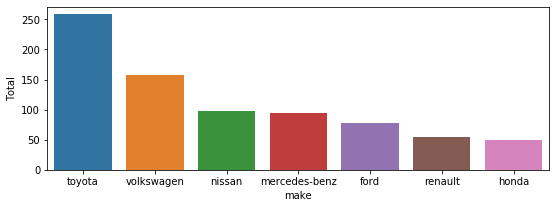

In [223]:
plt.figure(figsize=(9, 3))
sns.barplot(x='make', y='Total', data=make_group.sort_values(by='Total',ascending=False).head(7))

Mileage cleaning

In [224]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,"51,000 km",0.9 l,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,"54,800 km",1 l,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,"155,000 km",1.4 l,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,"161,000 km",2.2 l,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,"31,000 km",1.2 l,Manual


In [225]:
def replace_character(text):
    text = re.sub(r'.[A-Ba-z]+', '', str(text))
    text = text.replace(',', '')
    text = text.rstrip()
    return text

In [226]:
data['mileage'] = pd.to_numeric(data['mileage'].apply(lambda x: replace_character(x) if pd.notnull(x) else x))

Engine-size cleaning

In [227]:
data['engine-size'] = pd.to_numeric(data['engine-size'].apply(replace_character))

In [228]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,31000.0,1.2,Manual


Model cleaning

In [229]:
data['model'] = data['model'].str.lower()

In [230]:
def remove_characters(text):
    text = re.sub(r'[!@#$]','', text)
    
    return text.lower()

In [231]:
data['model'] = data['model'].apply(lambda x: remove_characters(x))

In [232]:
data['variant'].sort_values().unique()

array(['(66kW) turbo Expression', '0.9T Acenta', '0.9T Acenta Plus',
       '0.9T Visia', '1.0  X- PLAY (5DR)', '1.0  X-CLUSIV (5DR)',
       '1.0 5DR', '1.0 CLIMBER 5DR', '1.0 CLIMBER 5DR with abs',
       '1.0 DYNAMIQUE 5DR A/T', '1.0 Dynamique with ABS',
       '1.0 ECOBOOST AMBIENTE 5Dr', '1.0 ECOBOOST TITANIUM',
       '1.0 ECOBOOST TREND', '1.0 ECOBOOST TREND 5DR',
       '1.0 ECOBOOST TREND POWERSHIF', '1.0 Expression', '1.0 HB',
       '1.0 MOTION', '1.0 Start', '1.0 Style', '1.0 TSI COMFORTLINE',
       '1.0 TSI COMFORTLINE 66Kw (New Shape)', '1.0 TSI COMFORTLINE DSG',
       '1.0 TSI GT (5DR)', '1.0 TSI HIGHLINE DSG (85KW)',
       '1.0 TSI R-Line', '1.0 TSI TRENDLINE', '1.0 WILD 5DR',
       '1.0 X- PLAY (5DR)', '1.0 X- PLAY SILVER', '1.0 X-CITE (5DR)',
       '1.0T ECOFLEX ESSENTIA 5DR', '1.0TGDI EXECUTIVE', '1.1 MOTION',
       '1.1 STRIKER', '1.2 (7 SEAT)', '1.2 COMFORT', '1.2 COMFORT 5DR',
       '1.2 DIG-T Acenta', '1.2 DIG-T Acenta+', '1.2 EX Automatic',
       '1.2 GL

Reg cleaning

In [233]:
def clean_reg(text):
    text = text.lower()
    if any(word in text for word in ['new']):
        return 'new'
    
    return 'used'

In [234]:
data['reg'] = data['reg'].apply(clean_reg)

In [235]:
data['reg'].value_counts(dropna=False)

used    721
new     365
Name: reg, dtype: int64

Previous owner cleaning

In [236]:
index = data[(data['previous-owners'].isna()) & (data['reg'] == 'new')].index

In [237]:
data.loc[index, 'previous-owners']= 0

In [238]:
missing_percentage(data)

,Total,Percent
mpg,964,89.0
interior-colour,212,20.0
previous-owners,125,12.0
mileage,97,9.0
exterior-colour,42,4.0
transmission,25,2.0
engine-size,20,2.0
fuel-type,19,2.0
doors,16,1.0
colour,2,0.0


In [239]:
data.head(5)

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,31000.0,1.2,Manual


colour cleaning 

In [240]:
data['colour'] = data['colour'].str.lower()

In [241]:
data['colour'] = data['colour'].fillna("other")

In [242]:
data['colour'].unique()

array(['blue', 'silver', 'white', 'yellow', 'gold', 'bronze', 'maroon',
       'red', 'black', 'beige', 'other', 'brown', 'grey', 'multi-colour',
       'orange', 'cream', 'green', 'sonic quartz (31i)'], dtype=object)

In [243]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,greenise,blue/siler,5,Petrol,Hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,grey,silver,5,Petrol,Hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,Grey,White,2,Petrol,Bakkie Single Cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,grey,Silver,5,Petrol,Hatchback,31000.0,1.2,Manual


interior-colour cleaning

In [244]:
def cleaning_interior(text, interior):
    text = text.lower().rstrip()
    if "black" in text:
        text = "black"
    
    if any(i in text for i in interior):
        text = 'other'
    return text

In [245]:
interior = data.groupby(['interior-colour'])['interior-colour'].count().to_frame('TotalCount').sort_values(by='TotalCount', ascending=False).reset_index()

In [246]:
interior = interior[interior['TotalCount'] < 10]['interior-colour'].unique()

In [247]:
data['interior-colour'] = data['interior-colour'].apply(lambda x: cleaning_interior(x, interior) if pd.notnull(x) else x)

In [248]:
data['interior-colour'].value_counts(dropna=False)

black                  637
NaN                    212
other                  210
beige                   13
beigh                    2
multi colour             2
multi-colour             1
macchiato beige          1
dinamica artico          1
sahara beige             1
beig                     1
baige                    1
red                      1
artico sahara beige      1
hazel / blk leather      1
venetian beige           1
Name: interior-colour, dtype: int64

In [249]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5,Petrol,Hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,other,silver,5,Petrol,Hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,other,White,2,Petrol,Bakkie Single Cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5,Diesel,Hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,other,Silver,5,Petrol,Hatchback,31000.0,1.2,Manual


Doors cleaning

In [250]:
data['doors'].value_counts(dropna=False)

5         618
4         335
2          99
NaN        16
3          15
Petrol      2
1           1
Name: doors, dtype: int64

In [251]:
data['doors'] = data['doors'].apply(lambda x: replace_character(x) if pd.notnull(x) else x).replace('', np.nan).astype(float)

fuel-type cleaning

In [252]:
data['fuel-type'].value_counts(normalize=True, dropna=False)

Petrol        0.631676
Diesel        0.348987
NaN           0.017495
Sedan         0.000921
5 DOOR SUV    0.000921
Name: fuel-type, dtype: float64

In [253]:
def clean_fuel(text):
    text = text.lower()
    if "petr" in text:
        text = "petrol"
    elif "dies" in text:
        text = "diesel"
    else:
        text = np.nan
    
    return text

In [254]:
data['fuel-type'] = data['fuel-type'].apply(lambda x: clean_fuel(x) if pd.notnull(x) else x)

In [255]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5.0,petrol,Hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,other,silver,5.0,petrol,Hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,other,White,2.0,petrol,Bakkie Single Cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5.0,diesel,Hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,other,Silver,5.0,petrol,Hatchback,31000.0,1.2,Manual


bodystyle cleaning

In [256]:
data['bodystyle'].value_counts(normalize=True, dropna=False)

SUV                                 0.306630
Hatchback                           0.218232
Sedan                               0.163904
Bakkie Double Cab                   0.125230
Bakkie Single Cab                   0.055249
MPV                                 0.021179
cross-over                          0.020258
Panel Van                           0.013812
Coupe                               0.013812
Bakkie King Cab                     0.012891
MINIBUS                             0.010129
Station Wagon                       0.009208
Mini MPV                            0.004604
Cabriolet                           0.003683
Pick Up                             0.002762
Chassis Cab                         0.002762
Fastback                            0.002762
panel van - crew cab                0.001842
SUV Hardtop                         0.001842
Pillarless Double Cab Pick Up       0.000921
pick-up - single cab chassis cab    0.000921
76,000 km                           0.000921
Street    

In [257]:
def clean_body(text):
    text = text.lower()
    if "hatch" in text:
        text = "hatchback"
    elif "double" in text:
        text = "double cab"
    elif "single" in text:
        text = "single cab"
    elif "cab" in text:
        text = "cab"
    elif "suv" in text:
        text = "suv"
    elif "mpv" in text:
        text = "mpv"

    return text

In [258]:
data['bodystyle'] = data['bodystyle'].apply(clean_body)

In [259]:
bodystyle = data.groupby(['bodystyle']).agg({'bodystyle': 'count'}).rename(columns={'bodystyle': 'Total'}).reset_index()

In [260]:
style = data[data['bodystyle'].isin(bodystyle[bodystyle['Total'] < 10]['bodystyle'])].index
data.loc[style, 'bodystyle'] = 'other'

In [261]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5.0,petrol,hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,other,silver,5.0,petrol,hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,other,White,2.0,petrol,single cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5.0,diesel,hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,other,Silver,5.0,petrol,hatchback,31000.0,1.2,Manual


In [262]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5.0,petrol,hatchback,51000.0,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,other,silver,5.0,petrol,hatchback,54800.0,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,other,White,2.0,petrol,single cab,155000.0,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5.0,diesel,hatchback,161000.0,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,other,Silver,5.0,petrol,hatchback,31000.0,1.2,Manual


transmission cleaning

In [263]:
data['transmission'].value_counts(dropna=False)

Manual                 571
Automatic              453
CVT                     32
NaN                     25
automated manual         2
Tiptronic Automatic      2
Not Available            1
Name: transmission, dtype: int64

In [264]:
def transmission_cleaning(text):
    text = text.lower()
    
    if "auto" in text:
        text = "automatic"
    elif "manual":
        text = "manual"
        
    return text

In [265]:
data['transmission'] = data['transmission'].apply(lambda x: transmission_cleaning(x) if pd.notnull(x) else x)

In [266]:
missing_percentage(data)

,Total,Percent
mpg,964,89.0
interior-colour,212,20.0
previous-owners,125,12.0
mileage,97,9.0
exterior-colour,42,4.0
transmission,25,2.0
fuel-type,21,2.0
engine-size,20,2.0
doors,18,2.0


In [267]:
data.tail()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
1172,20,https://www.namauto.com/cars/9553266-mercedes-...,1739900,mercedes-benz,gle,63 S AMG,used,1.0,NaN,white,black,White,5.0,petrol,suv,13000.0,5.5,automatic
1173,21,https://www.namauto.com/cars/8233485-mercedes-...,1789900,mercedes-benz,gle,COUPE 63 S AMG,used,1.0,NaN,white,black,Diamond White,5.0,petrol,suv,18000.0,5.5,automatic
1174,22,https://www.namauto.com/cars/7400841-lexus-lx-...,1795800,lexus,lx,570,new,0.0,NaN,silver,beige,Silver,5.0,petrol,suv,NaN,5.7,automatic
1175,23,https://www.namauto.com/cars/9593465-mercedes-...,2450000,mercedes-benz,g-class,AMG G63,new,0.0,NaN,black,black,Obsidian Black,5.0,petrol,suv,100.0,4.0,automatic
1176,0,https://www.namauto.com/cars/9655621-mercedes-...,2590000,mercedes-benz,gle,GLE63,new,0.0,NaN,white,black,Diamond White,5.0,petrol,suv,NaN,5.5,automatic


# Data cleaning

In [268]:
# drop column
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5.0,petrol,hatchback,51000.0,0.9,automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up,up! 5-door 1.0,used,1.0,NaN,silver,other,silver,5.0,petrol,hatchback,54800.0,1.0,manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,strada,1.4 WORKING,used,1.0,NaN,white,other,White,2.0,petrol,single cab,155000.0,1.4,manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5.0,diesel,hatchback,161000.0,2.2,manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,go,1.2 LUX,used,1.0,NaN,silver,other,Silver,5.0,petrol,hatchback,31000.0,1.2,manual


In [269]:
cols = ['url', 'mpg', 'exterior-colour', 'variant']
data.drop(cols, axis=1, inplace=True)

In [270]:
missing_percentage(data)

,Total,Percent
interior-colour,212,20.0
previous-owners,125,12.0
mileage,97,9.0
transmission,25,2.0
fuel-type,21,2.0
engine-size,20,2.0
doors,18,2.0


In [271]:
data.head()

,index,price,make,model,reg,previous-owners,colour,interior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,59999,smart,forfour,used,1.0,blue,other,5.0,petrol,hatchback,51000.0,0.9,automatic
1,1,74999,volkswagen,up,used,1.0,silver,other,5.0,petrol,hatchback,54800.0,1.0,manual
2,2,75000,fiat,strada,used,1.0,white,other,2.0,petrol,single cab,155000.0,1.4,manual
3,3,75000,honda,civic,used,1.0,blue,black,5.0,diesel,hatchback,161000.0,2.2,manual
4,4,95900,datsun,go,used,1.0,silver,other,5.0,petrol,hatchback,31000.0,1.2,manual


In [272]:
data.describe()

,index,price,previous-owners,doors,mileage,engine-size
count,1086.000000,1.086000e+03,961.000000,1068.000000,989.000000,1066.000000
mean,11.545120,3.774502e+05,0.689906,4.376404,52654.944388,2.170356
std,6.913507,2.832518e+05,0.654784,0.911596,55112.471535,0.988689
min,0.000000,5.990000e+04,0.000000,1.000000,1.000000,0.900000
25%,6.000000,1.950000e+05,0.000000,4.000000,20.000000,1.500000
50%,12.000000,3.001000e+05,1.000000,5.000000,44000.000000,2.000000
75%,17.750000,4.605632e+05,1.000000,5.000000,86800.000000,2.700000
max,23.000000,2.735881e+06,5.000000,5.000000,326000.000000,6.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A998346198>,
      dtype=object)

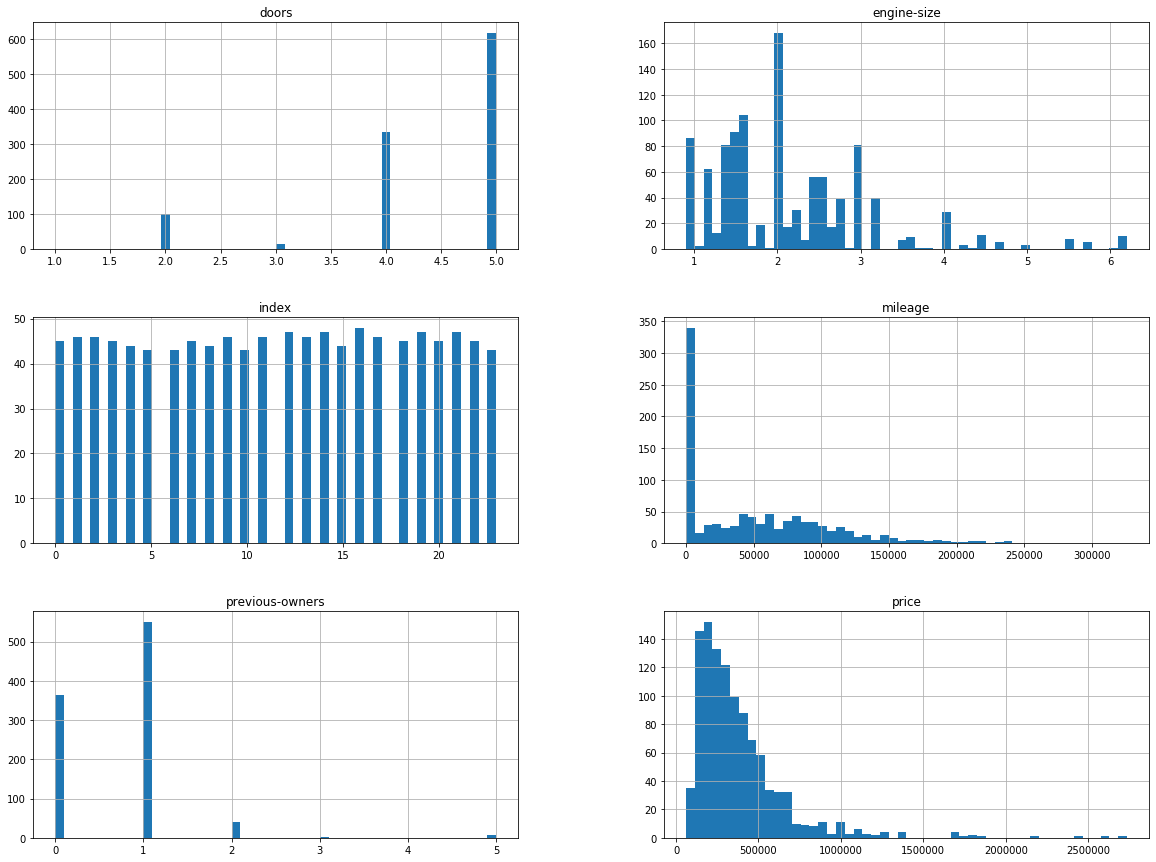

In [273]:
data.hist(bins=50, figsize=(20, 15))

Correlation

In [274]:
cor = data.corr()

In [275]:
cor

,index,price,previous-owners,doors,mileage,engine-size
index,1.000000,0.019723,-0.055153,-0.033498,0.029059,0.031775
price,0.019723,1.000000,-0.152433,0.045351,-0.293667,0.570839
previous-owners,-0.055153,-0.152433,1.000000,0.030314,0.578226,0.183241
doors,-0.033498,0.045351,0.030314,1.000000,-0.069070,-0.182556
mileage,0.029059,-0.293667,0.578226,-0.069070,1.000000,0.261391
engine-size,0.031775,0.570839,0.183241,-0.182556,0.261391,1.000000


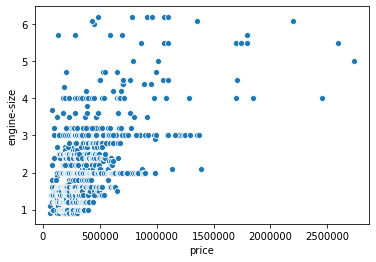

In [276]:
sns.scatterplot(x='price', y='engine-size', data=data)

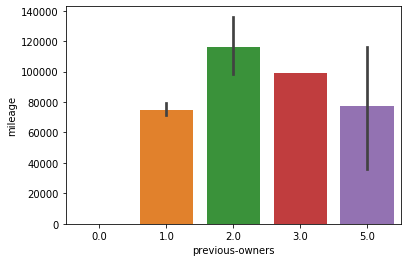

In [277]:
sns.barplot(y='mileage', x='previous-owners', data=data)

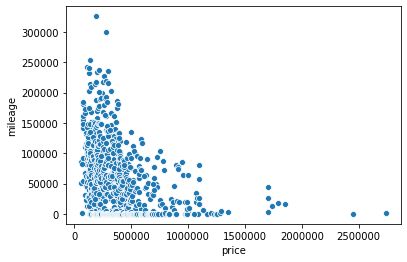

In [278]:
sns.scatterplot(x='price', y='mileage', data=data)

In [279]:
missing_percentage(data)

,Total,Percent
interior-colour,212,20.0
previous-owners,125,12.0
mileage,97,9.0
transmission,25,2.0
fuel-type,21,2.0
engine-size,20,2.0
doors,18,2.0


In [280]:
from sklearn.impute import SimpleImputer

In [281]:
imputer = SimpleImputer(strategy="mean")

In [282]:
num_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns.values

In [283]:
data[num_cols]

,index,price,previous-owners,doors,mileage,engine-size
0,0,59999,1.0,5.0,51000.0,0.9
1,1,74999,1.0,5.0,54800.0,1.0
2,2,75000,1.0,2.0,155000.0,1.4
3,3,75000,1.0,5.0,161000.0,2.2
4,4,95900,1.0,5.0,31000.0,1.2
5,5,99000,1.0,5.0,135500.0,1.4
6,6,99900,1.0,5.0,132000.0,1.4
7,7,99900,1.0,5.0,135000.0,1.4
8,8,100000,1.0,2.0,87000.0,3.2
9,9,101900,1.0,5.0,83050.0,1.5


In [284]:
data.head()

,index,price,make,model,reg,previous-owners,colour,interior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,59999,smart,forfour,used,1.0,blue,other,5.0,petrol,hatchback,51000.0,0.9,automatic
1,1,74999,volkswagen,up,used,1.0,silver,other,5.0,petrol,hatchback,54800.0,1.0,manual
2,2,75000,fiat,strada,used,1.0,white,other,2.0,petrol,single cab,155000.0,1.4,manual
3,3,75000,honda,civic,used,1.0,blue,black,5.0,diesel,hatchback,161000.0,2.2,manual
4,4,95900,datsun,go,used,1.0,silver,other,5.0,petrol,hatchback,31000.0,1.2,manual


In [285]:
data[num_cols] = data[num_cols].fillna(np.ceil(data[num_cols].mean()))

In [286]:
cat_cols = data.columns.difference(num_cols)

In [287]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [288]:
missing_percentage(data)

,Total,Percent


In [289]:
data.drop(['index'], axis=1, inplace=True)

In [290]:
data.head()
data2 = data

# Dummy data & Mean Normalization

In [291]:
def dummy_df(data, cat_cols):
    for x in cat_cols:
        dummies = pd.get_dummies(data[x], drop_first=True, dummy_na=False, prefix=x)
        data = data.drop(x, axis=1)
        data = pd.concat([data, dummies], axis=1)
    return data

In [292]:
data = dummy_df(data, cat_cols)

In [293]:
data.head()

,price,previous-owners,doors,mileage,engine-size,bodystyle_coupe,bodystyle_cross-over,bodystyle_double cab,bodystyle_hatchback,bodystyle_minibus,...,model_x3,model_x4,model_x5,model_x6,model_xe,model_xf,model_xuv 500,model_yaris,reg_used,transmission_manual
0,59999,1.0,5.0,51000.0,0.9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,74999,1.0,5.0,54800.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,75000,1.0,2.0,155000.0,1.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,75000,1.0,5.0,161000.0,2.2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,95900,1.0,5.0,31000.0,1.2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [294]:
from sklearn.model_selection import train_test_split

In [295]:
y = data.price
X = data.drop(['price'], axis=1)

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
X_train.head()

,previous-owners,doors,mileage,engine-size,bodystyle_coupe,bodystyle_cross-over,bodystyle_double cab,bodystyle_hatchback,bodystyle_minibus,bodystyle_mpv,...,model_x3,model_x4,model_x5,model_x6,model_xe,model_xf,model_xuv 500,model_yaris,reg_used,transmission_manual
334,1.0,5.0,15000.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
546,0.0,5.0,52655.0,1.2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
905,1.0,4.0,28000.0,1.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
218,1.0,5.0,100500.0,2.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
260,1.0,5.0,65000.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [298]:
X_test.head()

,previous-owners,doors,mileage,engine-size,bodystyle_coupe,bodystyle_cross-over,bodystyle_double cab,bodystyle_hatchback,bodystyle_minibus,bodystyle_mpv,...,model_x3,model_x4,model_x5,model_x6,model_xe,model_xf,model_xuv 500,model_yaris,reg_used,transmission_manual
703,0.0,5.0,52655.0,1.6,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
57,1.0,5.0,81000.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
903,0.0,5.0,1.0,1.6,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
953,1.0,4.0,38000.0,3.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
759,0.0,5.0,15.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [299]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [300]:
X_test_1 = X_test
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Model Building

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [302]:
lin_reg = LinearRegression(normalize=True, n_jobs=-1)

In [303]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [304]:
y_pred = lin_reg.predict(X_test)

Final Result

In [305]:
from sklearn.metrics import mean_squared_error

In [306]:
lin_mse = mean_squared_error(y_test, y_pred)

In [307]:
lin_rmse = np.sqrt(lin_mse)

In [308]:
lin_rmse

2.3467064548821676e+19

In [309]:
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])

In [310]:
y_pred.index = y_test.index.values

In [311]:
pd.DataFrame(pd.concat([y_pred, y_test] , axis=1)).to_csv('prediction.csv', index=True)

In [312]:
data2[data2.index.isin([294])]

,price,make,model,reg,previous-owners,colour,interior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
294,512000,mercedes-benz,gla,used,1.0,blue,dinamica artico,5.0,diesel,suv,55500.0,2.1,automatic
